### **Projeto - Análise de dados com Python e Pandas**

Este é o primeiro projeto prático do Bootcamp Ciência de Dados DIO - Unimed-BH, seu objetivo é realizar uma análise exploratória de uma base de dados utilizando a biblioteca Pandas. Além dela, também foi utilizada a biblioteca Matplotlib.

A base de dados utilizada foi extraída do repositório da Agência Nacional de Saúde Suplementar (ANS), disponível em:

http://ftp.dadosabertos.ans.gov.br/FTP/PDA/dados_de_beneficiarios_por_operadora/

Esta base contém informações de beneficiários **ATIVOS** das operadoras de planos de saúde, reportadas mensalmente para a ANS.

In [ ]:
# Importando as bibliotecas a serem utilizadas
import pandas as pd # Pandas
import matplotlib as plt # Matplotlib

#### ----------------

### Importando e preparando o arquivo para análise

In [ ]:
# Lendo o banco de dados
df_sib = pd.read_csv("/content/drive/MyDrive/Bootcamp_DIO_Unimed-BH/sib_202208_MG.csv", 
                     dtype= str, encoding='latin-1', error_bad_lines=False, sep=";")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Dimensões da base de dados (linhas e colunas)
df_sib.shape

(8269427, 27)

In [ ]:
# Visualizando as 5 primeiras linhas
df_sib.head()

,ID_TEMPO_COMPETENCIA,CD_OPERADORA,DT_INCLUSAO,CD_BENE_MOTV_INCLUSAO,IND_PORTABILIDADE,ID_MOTIVO_MOVIMENTO,LG_BENEFICIARIO_ATIVO,DT_NASCIMENTO,TP_SEXO,CD_PLANO_RPS,...,CD_MUNICIPIO,SG_UF,LG_RESIDE_EXTERIOR,DT_REATIVACAO,DT_ULTIMA_REATIVACAO,DT_ULTIMA_MUDA_CONTRATUAL,DT_CANCELAMENTO,DT_ULTIMO_CANCELAMENTO,CD_BENE_MOTIV_CANCELAMENTO,DT_CARGA
0,202208,408263,2011-02,11,NAO,74,1,1944,M,435618017,...,310260,MG,0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10
1,202208,408263,2011-02,11,NAO,74,1,1969,M,435618017,...,315180,MG,0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10
2,202208,408263,2011-02,11,NAO,21,1,1975,M,435618017,...,310260,MG,0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10
3,202208,408263,2011-02,11,NAO,74,1,1965,M,435618017,...,310140,MG,0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10
4,202208,320838,2011-04,11,NAO,74,1,2004,M,418087999,...,315960,MG,0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10


In [ ]:
# Deletando colunas que não serão utilizadas
df_sib = df_sib.drop(columns = ["LG_BENEFICIARIO_ATIVO",
                                "NR_PLANO_PORTABILIDADE",
                                "DT_PRIMEIRA_CONTRATACAO",
                                "DT_REATIVACAO",
                                "DT_ULTIMA_REATIVACAO",
                                "DT_ULTIMA_MUDA_CONTRATUAL",
                                "DT_CANCELAMENTO",
                                "DT_ULTIMO_CANCELAMENTO",
                                "CD_BENE_MOTIV_CANCELAMENTO",
                                "DT_CARGA"])

In [ ]:
df_sib.head()

,ID_TEMPO_COMPETENCIA,CD_OPERADORA,DT_INCLUSAO,CD_BENE_MOTV_INCLUSAO,IND_PORTABILIDADE,ID_MOTIVO_MOVIMENTO,DT_NASCIMENTO,TP_SEXO,CD_PLANO_RPS,CD_PLANO_SCPA,DT_CONTRATACAO,ID_BENE_TIPO_DEPENDENTE,LG_COBERTURA_PARCIAL,LG_ITEM_EXCLUIDO_COBERTURA,CD_MUNICIPIO,SG_UF,LG_RESIDE_EXTERIOR
0,202208,408263,2011-02,11,NAO,74,1944,M,435618017,NaN,2004-04,1,0,0,310260,MG,0
1,202208,408263,2011-02,11,NAO,74,1969,M,435618017,NaN,2001-12,1,0,0,315180,MG,0
2,202208,408263,2011-02,11,NAO,21,1975,M,435618017,NaN,2007-02,1,0,1,310260,MG,0
3,202208,408263,2011-02,11,NAO,74,1965,M,435618017,NaN,2003-07,1,0,0,310140,MG,0
4,202208,320838,2011-04,11,NAO,74,2004,M,418087999,NaN,2011-03,4,0,0,315960,MG,0


In [ ]:
# Tipos dos dados nas colunas (por argumento, todas foram importadas como str)
df_sib.dtypes

ID_TEMPO_COMPETENCIA          object
CD_OPERADORA                  object
DT_INCLUSAO                   object
CD_BENE_MOTV_INCLUSAO         object
IND_PORTABILIDADE             object
ID_MOTIVO_MOVIMENTO           object
DT_NASCIMENTO                 object
TP_SEXO                       object
CD_PLANO_RPS                  object
CD_PLANO_SCPA                 object
DT_CONTRATACAO                object
ID_BENE_TIPO_DEPENDENTE       object
LG_COBERTURA_PARCIAL          object
LG_ITEM_EXCLUIDO_COBERTURA    object
CD_MUNICIPIO                  object
SG_UF                         object
LG_RESIDE_EXTERIOR            object
dtype: object

In [ ]:
# Filtrando registros de interesse (somente beneficiários Unimed-BH)
sib_unimedbh = df_sib.loc[df_sib["CD_OPERADORA"] == "343889"]
sib_unimedbh.head()

,ID_TEMPO_COMPETENCIA,CD_OPERADORA,DT_INCLUSAO,CD_BENE_MOTV_INCLUSAO,IND_PORTABILIDADE,ID_MOTIVO_MOVIMENTO,DT_NASCIMENTO,TP_SEXO,CD_PLANO_RPS,CD_PLANO_SCPA,DT_CONTRATACAO,ID_BENE_TIPO_DEPENDENTE,LG_COBERTURA_PARCIAL,LG_ITEM_EXCLUIDO_COBERTURA,CD_MUNICIPIO,SG_UF,LG_RESIDE_EXTERIOR
418830,202208,343889,2001-08,NaN,NAO,74,1973,F,459826091,NaN,2001-07,1,0,0,310620,MG,0
425334,202208,343889,2010-12,12,NAO,74,1996,F,433432009,NaN,2010-11,4,0,0,310620,MG,0
425383,202208,343889,2008-09,11,NAO,21,1959,F,436182012,NaN,2008-08,1,0,0,310620,MG,0
425384,202208,343889,2008-09,12,NAO,21,1965,F,436182012,NaN,2008-08,1,0,0,310620,MG,0
425385,202208,343889,2004-05,NaN,NAO,74,2004,F,433431001,NaN,2004-04,1,0,0,310620,MG,0


In [ ]:
# Resetando index e inserindo id_benef
sib_unimedbh = sib_unimedbh.reset_index()
sib_unimedbh = sib_unimedbh.rename(columns = {"index":"id_benef"})
sib_unimedbh["id_benef"] = sib_unimedbh.index + 1
sib_unimedbh["id_benef"] = sib_unimedbh["id_benef"].astype(str)

In [ ]:
# Dimensões da base de dados filtrada
sib_unimedbh.shape

(1744725, 18)

In [ ]:
# Verificando dados em branco nas colunas
sib_unimedbh.isnull().sum()

id_benef                            0
ID_TEMPO_COMPETENCIA                0
CD_OPERADORA                        0
DT_INCLUSAO                         0
CD_BENE_MOTV_INCLUSAO           97806
IND_PORTABILIDADE                   0
ID_MOTIVO_MOVIMENTO                96
DT_NASCIMENTO                       0
TP_SEXO                             0
CD_PLANO_RPS                    38718
CD_PLANO_SCPA                 1706007
DT_CONTRATACAO                      0
ID_BENE_TIPO_DEPENDENTE             0
LG_COBERTURA_PARCIAL              198
LG_ITEM_EXCLUIDO_COBERTURA        205
CD_MUNICIPIO                        0
SG_UF                               0
LG_RESIDE_EXTERIOR                  0
dtype: int64

In [ ]:
# Convertendos datas em str para datetime
sib_unimedbh["DT_INCLUSAO"] = pd.to_datetime(sib_unimedbh["DT_INCLUSAO"], format="%Y-%m")
sib_unimedbh["DT_CONTRATACAO"] = pd.to_datetime(sib_unimedbh["DT_CONTRATACAO"], format="%Y-%m")

# obs.: a variável DT_NASCIMENTO apresenta somente o ano de nascimento, por isso não foi convertida para datetime
# Convertendo o ano_nascimento para numérico e então para inteiro
sib_unimedbh["DT_NASCIMENTO"] = sib_unimedbh["DT_NASCIMENTO"].astype(int)

In [ ]:
# Verificando a conversão dos tipos de dados
sib_unimedbh.dtypes

id_benef                              object
ID_TEMPO_COMPETENCIA                  object
CD_OPERADORA                          object
DT_INCLUSAO                   datetime64[ns]
CD_BENE_MOTV_INCLUSAO                 object
IND_PORTABILIDADE                     object
ID_MOTIVO_MOVIMENTO                   object
DT_NASCIMENTO                          int64
TP_SEXO                               object
CD_PLANO_RPS                          object
CD_PLANO_SCPA                         object
DT_CONTRATACAO                datetime64[ns]
ID_BENE_TIPO_DEPENDENTE               object
LG_COBERTURA_PARCIAL                  object
LG_ITEM_EXCLUIDO_COBERTURA            object
CD_MUNICIPIO                          object
SG_UF                                 object
LG_RESIDE_EXTERIOR                    object
dtype: object

In [ ]:
sib_unimedbh.head()

,id_benef,ID_TEMPO_COMPETENCIA,CD_OPERADORA,DT_INCLUSAO,CD_BENE_MOTV_INCLUSAO,IND_PORTABILIDADE,ID_MOTIVO_MOVIMENTO,DT_NASCIMENTO,TP_SEXO,CD_PLANO_RPS,CD_PLANO_SCPA,DT_CONTRATACAO,ID_BENE_TIPO_DEPENDENTE,LG_COBERTURA_PARCIAL,LG_ITEM_EXCLUIDO_COBERTURA,CD_MUNICIPIO,SG_UF,LG_RESIDE_EXTERIOR
0,1,202208,343889,2001-08-01,NaN,NAO,74,1973,F,459826091,NaN,2001-07-01,1,0,0,310620,MG,0
1,2,202208,343889,2010-12-01,12,NAO,74,1996,F,433432009,NaN,2010-11-01,4,0,0,310620,MG,0
2,3,202208,343889,2008-09-01,11,NAO,21,1959,F,436182012,NaN,2008-08-01,1,0,0,310620,MG,0
3,4,202208,343889,2008-09-01,12,NAO,21,1965,F,436182012,NaN,2008-08-01,1,0,0,310620,MG,0
4,5,202208,343889,2004-05-01,NaN,NAO,74,2004,F,433431001,NaN,2004-04-01,1,0,0,310620,MG,0


In [ ]:
# Substituindo valores - Relação de dependência
sib_unimedbh["ID_BENE_TIPO_DEPENDENTE"] = sib_unimedbh["ID_BENE_TIPO_DEPENDENTE"].replace("1", "Titular")
sib_unimedbh["ID_BENE_TIPO_DEPENDENTE"] = sib_unimedbh["ID_BENE_TIPO_DEPENDENTE"].replace("3", "Cônjuge/Companheiro(a)")
sib_unimedbh["ID_BENE_TIPO_DEPENDENTE"] = sib_unimedbh["ID_BENE_TIPO_DEPENDENTE"].replace("4", "Filho(a)")
sib_unimedbh["ID_BENE_TIPO_DEPENDENTE"] = sib_unimedbh["ID_BENE_TIPO_DEPENDENTE"].replace("6", "Enteado(a)")
sib_unimedbh["ID_BENE_TIPO_DEPENDENTE"] = sib_unimedbh["ID_BENE_TIPO_DEPENDENTE"].replace("8", "Pai/Mãe")
sib_unimedbh["ID_BENE_TIPO_DEPENDENTE"] = sib_unimedbh["ID_BENE_TIPO_DEPENDENTE"].replace("10", "Agregado/Outros")


#### ----------------

### Análise exploratória

In [ ]:
# Beneficiários ativos - competência 08/2022
n_beneficiarios = sib_unimedbh["id_benef"].value_counts().sum()
print(f"A Unimed-BH reportou à ANS um total de{n_beneficiarios: ,} beneficiários ativos na competência 08/2022")

A Unimed-BH reportou à ANS um total de 1,744,725 beneficiários ativos na competência 08/2022


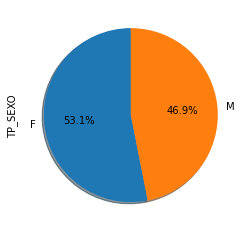

In [ ]:
# Beneficiários por sexo
sexo_benef = sib_unimedbh["TP_SEXO"].value_counts()
sexo_benef.plot.pie(autopct="%.1f%%", shadow=True, startangle=90)

Titular                   1027976
Filho(a)                   436436
Cônjuge/Companheiro(a)     256912
Pai/Mãe                     15294
Agregado/Outros              8099
Enteado(a)                      8
Name: ID_BENE_TIPO_DEPENDENTE, dtype: int64


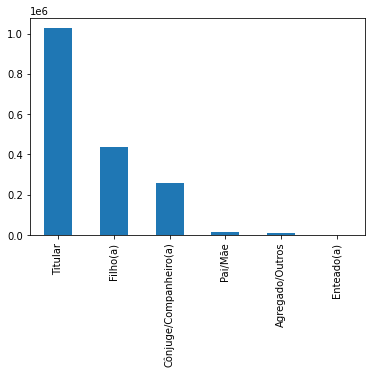

In [ ]:
# Beneficiários por relação de dependência
dependencia_benef = sib_unimedbh["ID_BENE_TIPO_DEPENDENTE"].value_counts()
print(dependencia_benef)
dependencia_benef.plot.bar() #(autopct="%.1f%%", shadow=True, startangle=90)

In [ ]:
# Beneficiários por município (recortando a base e selecionando os 10 primeiros)
benef_municipio = sib_unimedbh["CD_MUNICIPIO"].value_counts().to_frame()
benef_municipio = benef_municipio.rename(columns = {"CD_MUNICIPIO":"qtd_benef"})
benef_municipio = benef_municipio.nlargest(10, "qtd_benef")

In [ ]:
# Acrescentando coluna e atribuíndo nomes aos códigos dos municípios
benef_municipio = benef_municipio.reset_index()
benef_municipio = benef_municipio.rename(columns = {"index":"nome_municipio"})

benef_municipio["nome_municipio"] = benef_municipio["nome_municipio"].replace("310620", "Belo Horizonte")
benef_municipio["nome_municipio"] = benef_municipio["nome_municipio"].replace("311860", "Contagem")
benef_municipio["nome_municipio"] = benef_municipio["nome_municipio"].replace("310670", "Betim")
benef_municipio["nome_municipio"] = benef_municipio["nome_municipio"].replace("315460", "Ribeirão das Neves")
benef_municipio["nome_municipio"] = benef_municipio["nome_municipio"].replace("314480", "Nova Lima")
benef_municipio["nome_municipio"] = benef_municipio["nome_municipio"].replace("315780", "Santa Luzia")
benef_municipio["nome_municipio"] = benef_municipio["nome_municipio"].replace("312980", "Ibirité")
benef_municipio["nome_municipio"] = benef_municipio["nome_municipio"].replace("315670", "Sabará")
benef_municipio["nome_municipio"] = benef_municipio["nome_municipio"].replace("317120", "Vespasiano")
benef_municipio["nome_municipio"] = benef_municipio["nome_municipio"].replace("314930", "Pedro Leopoldo")


In [ ]:
benef_municipio

,nome_municipio,qtd_benef
0,Belo Horizonte,842576
1,Contagem,176971
2,Betim,119456
3,Ribeirão das Neves,43033
4,Nova Lima,37389
5,Santa Luzia,35973
6,Ibirité,32396
7,Sabará,25942
8,Vespasiano,22754
9,Pedro Leopoldo,17464


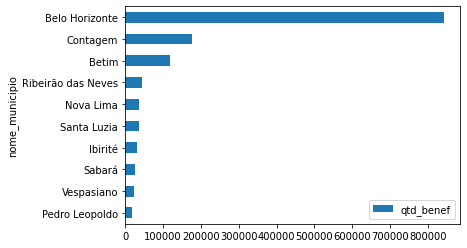

In [ ]:
benef_sorted_asce = benef_municipio.sort_values("qtd_benef", ascending=True)
benef_sorted_asce.plot.barh(x="nome_municipio")

# ----------------------------------------
